## Car Price Prediction
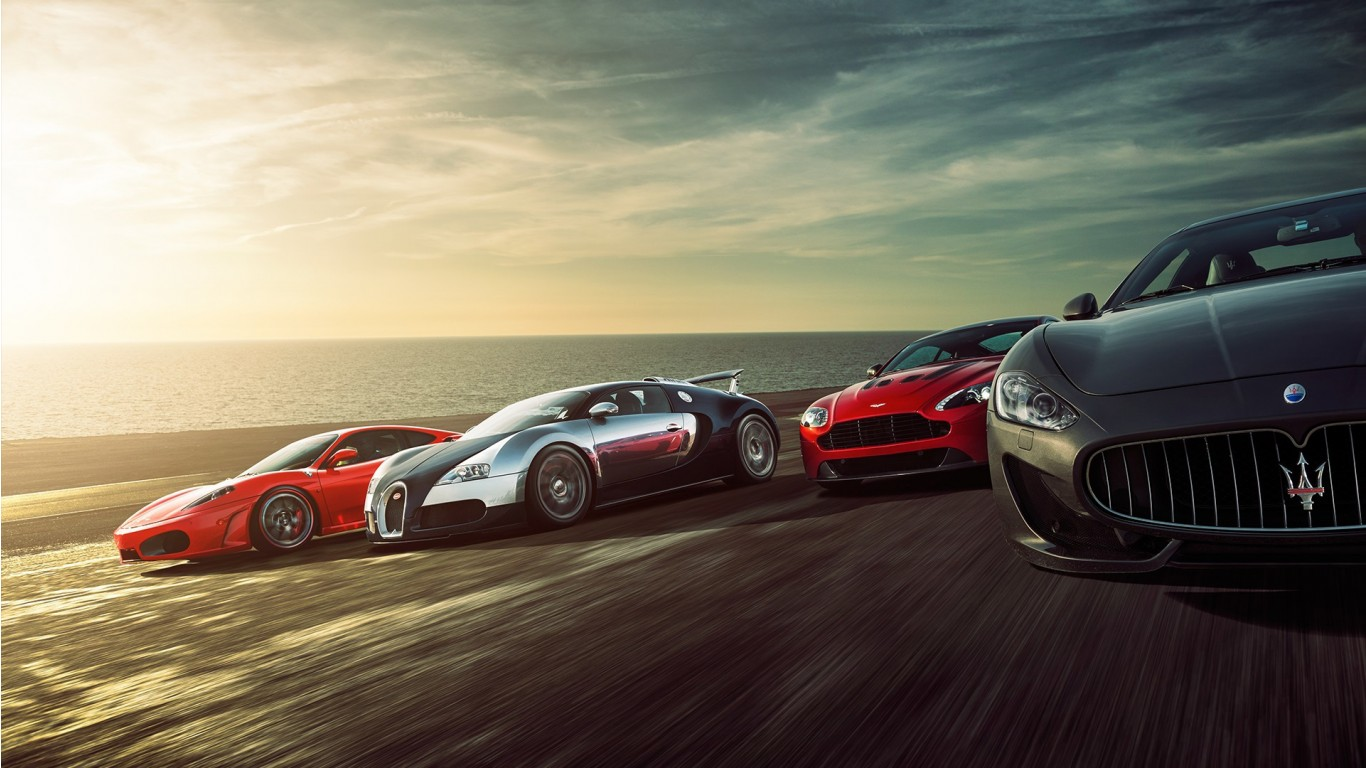

#### Import Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

### Data Collection
#### Reading Dataset

In [99]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploratory Data Analysis

#### Data Description

In [100]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Shape of Dataset

In [101]:
df.shape

(301, 9)

#### Information about data

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Unique Sub-Categories

In [103]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


#### Null Values

In [104]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Converting Category data into dummy variable

In [105]:
df_data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [106]:
df_data = pd.get_dummies(df_data, drop_first=True)

In [107]:
df_data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


### Data Cleaning 

In [108]:
df_data['Current_Year'] = 2020

In [109]:
df_data['No_of_Year'] = df_data['Current_Year'] - df_data['Year']

In [110]:
df_data.drop(['Year'], axis = 1, inplace=True)

In [111]:
df_data.drop(['Current_Year'], axis = 1, inplace=True)

In [112]:
df_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_Year
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,1,0,1,3
3,2.85,4.15,5200,0,0,1,0,1,9
4,4.60,6.87,42450,0,1,0,0,1,6


### Data Visualisation

#### Target Feature

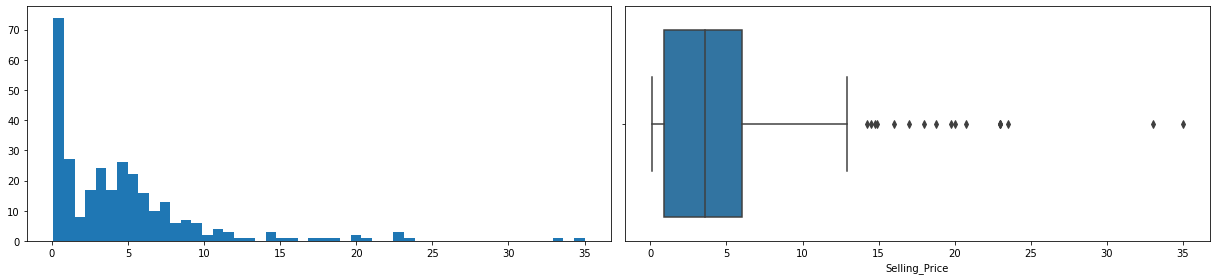

In [113]:
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols = 2, figsize=(17,4))
ax1.hist(df['Selling_Price'], bins = 50)
sns.boxplot(df['Selling_Price'], ax= ax2)
plt.tight_layout()
plt.show()

As we can see target feature is right skewed and there are some outlier in target variable , some values are far from distribution

#### Top 20 Cars

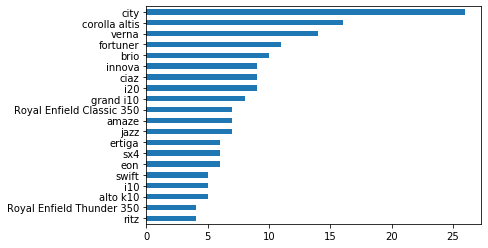

In [114]:
df['Car_Name'].value_counts().nlargest(20).sort_values().plot(kind = 'barh')

#### Scatter Plot (Independent Vs Target Variable )

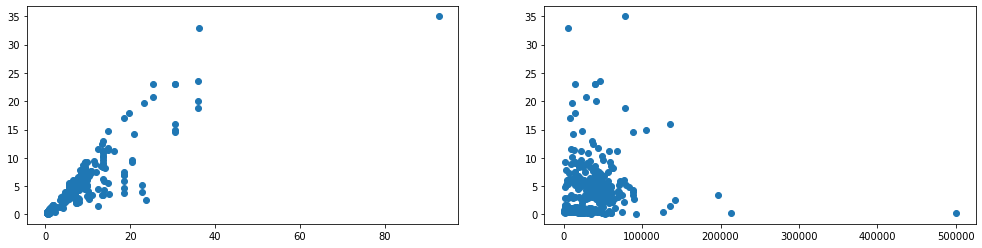

In [115]:
fig,(ax1, ax2) = plt.subplots(1 , 2, figsize = (17,4))
ax1.scatter(df_data['Present_Price'], df_data['Selling_Price'])
ax2.scatter(df_data['Kms_Driven'], df_data['Selling_Price'])

#### Barplot

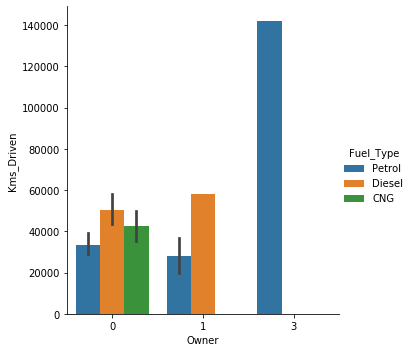

In [116]:
sns.catplot(x="Owner", y="Kms_Driven",hue='Fuel_Type', kind="bar", data=df)

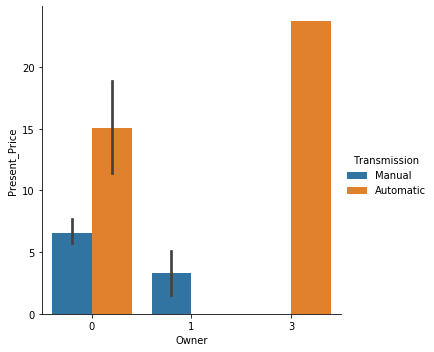

In [117]:
sns.catplot(x="Owner", y="Present_Price",hue='Transmission', kind="bar", data=df)

#### Histogram

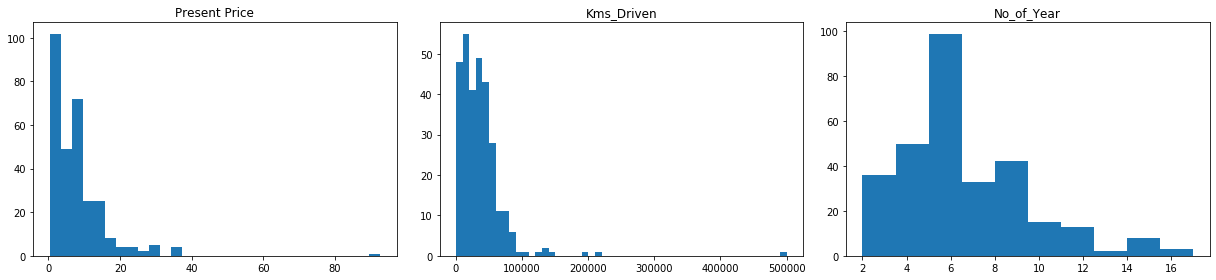

In [118]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols = 3, figsize=(17,4))
ax1.hist(df_data['Present_Price'], bins = 30)
ax1.set_title('Present Price')
ax2.hist(df_data['Kms_Driven'], bins = 50)
ax2.set_title('Kms_Driven')
ax3.hist(df_data['No_of_Year'], bins = 10)
ax3.set_title('No_of_Year')
plt.tight_layout()
plt.show()

As we can see the distributions are right skewed and there are some values they are so far from mean.

#### Count Plot

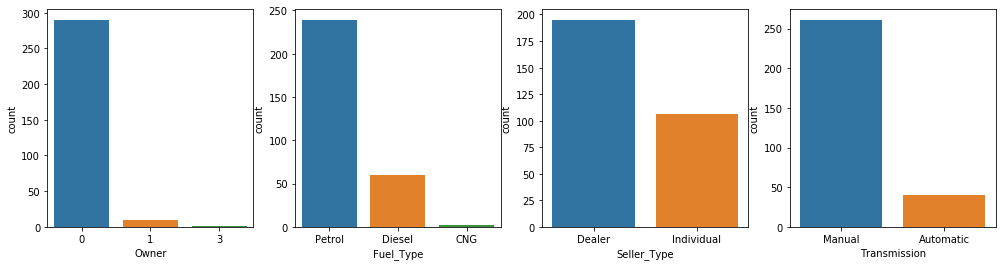

In [119]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows =1, ncols = 4, figsize=(17,4))
sns.countplot(x = 'Owner', data = df, ax = ax1)
sns.countplot(x = 'Fuel_Type', data = df, ax = ax2)
sns.countplot(x = 'Seller_Type', data = df, ax = ax3)
sns.countplot(x = 'Transmission', data = df, ax = ax4)
plt.show()

As we can see in the above count plots, most of the cars  don't have owners, few cars have the no. of of owners 1 and 3.
In Fuel Type feature most of the cars are have Petrol fuel type and there are few cars had Diesela and CNG.<br>
In Seller Type most of the seller are dealer and In transmission most of  the cars have Manual transmission.

#### Box Plot

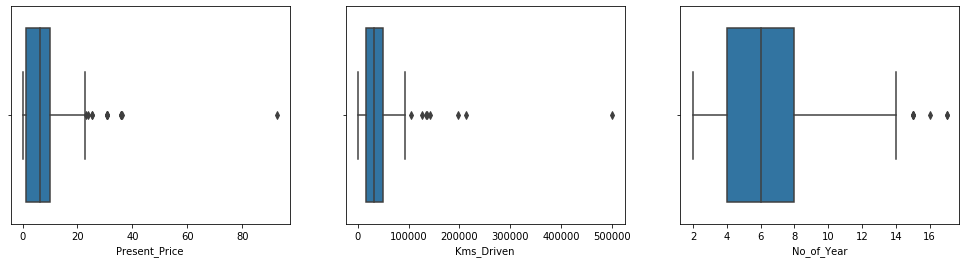

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols = 3, figsize=(17,4))
sns.boxplot(df['Present_Price'], ax = ax1)
sns.boxplot(df['Kms_Driven'], ax = ax2)
sns.boxplot(df_data['No_of_Year'], ax = ax3)

Here we can see the outlier in the above features, outlier affect your prediction of model

### Feature Selection
#### Heatmap - Correlation

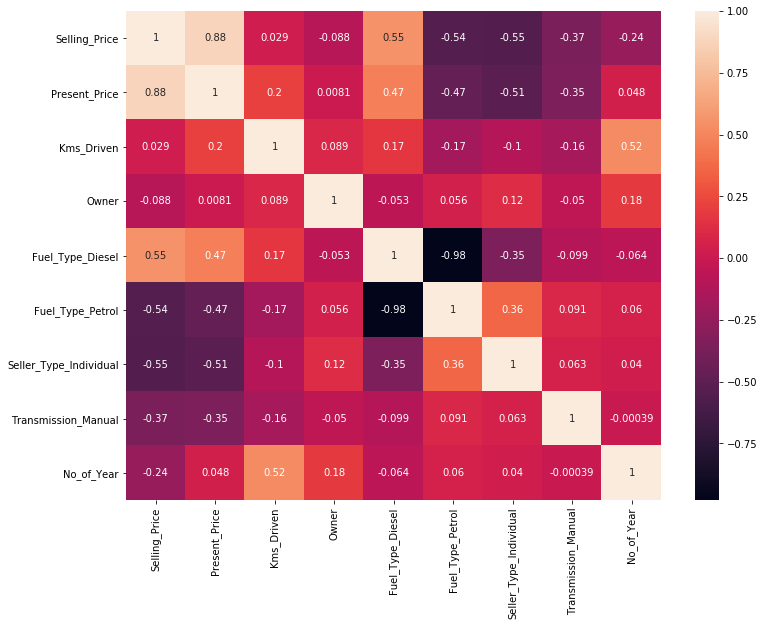

In [121]:
fig, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(df_data.corr(), annot = True, ax = ax)

In [122]:
df_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_Year
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316,0.182104
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643,-0.064315
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013,0.059959
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000,-0.000394
No_of_Year,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394,1.000000


In [123]:
X = df_data.iloc[:,1:]
y = df_data.iloc[:,0]

#### Top 5 Important feature for prediction of model 

In [124]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [125]:
etr.feature_importances_

array([0.39186293, 0.03754477, 0.00132253, 0.21243666, 0.0110017 ,
       0.1299125 , 0.13401002, 0.08190888])

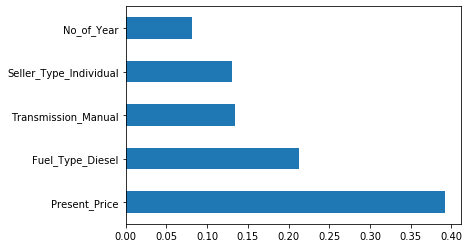

In [126]:
model = pd.Series(etr.feature_importances_, X.columns)
model.nlargest(5).plot(kind = 'barh')

#### TrainTest Split

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Generating Model

In [128]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [129]:
y_pred = random_reg.predict(X_test)

#### Training Accuracy

In [131]:
random_reg.score(X_train, y_train)

0.9864405961759118

#### Test Accuracy

In [132]:
random_reg.score(X_test, y_test)

0.9636825859822639

### Model Evaluation

In [133]:
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error :', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error : 0.8365928601639347
Mean Absolute Error : 0.6131491803278694
Root Mean Squared Error : 0.9146545031671438


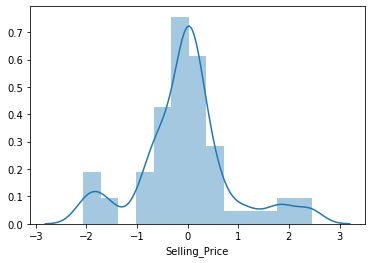

In [134]:
sns.distplot(y_test - y_pred)

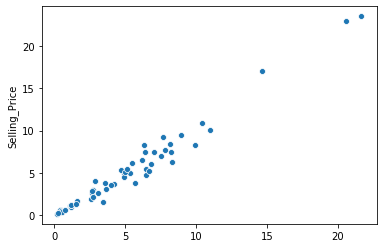

In [135]:
sns.scatterplot(y_pred, y_test)

In [136]:
import pickle
# Saving model to disk
pickle.dump(random_reg, open('car_pred.pkl','wb'))